In [1]:
import tags

tags.print_tags()

Available tags:
1: dynamic camera
2: dynamic objects
3: panning
4: self-occlusion
5: occlusion
6: deformable objects


In [3]:

from datasync import get_root_path

print(get_root_path())

/home/tiffa/gcp_assets


In [4]:

m_tags = "2,4"
tags.get_tags(m_tags)

['dynamic objects', 'self-occlusion']

In [12]:
import unity_to_featuretrack

m_tags = "2,4"
unity_to_featuretrack.process("FBData/twoblocksfalling_lit_bg_800p.zip", moveFile=False, tags_str=m_tags)

Initialized empty directory for shared bucket data at /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/twoblocksfalling.
Init tags: {'tags': ['dynamic objects', 'self-occlusion']}


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/twoblocksfalling/twoblocksfalling_teaser.mp4
Initialized empty directory for bucket data at /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/twoblocksfalling/feature_track_data.
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/twoblocksfalling/feature_track_data/lit_bg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/twoblocksfalling/feature_track_data/lit_bg_800p.input.npz
FBData/twoblocksfalling_lit_bg_800p.zip has been processed.


In [8]:
import unity_to_videoinput
unity_to_videoinput.process("FBData/threeblocksfalling_lit_bg_800p.zip", moveFile=True)

/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/threeblocksfalling/segmented_video_input/lit_bg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/threeblocksfalling/segmented_video_input/lit_bg_800p.input.npz
FBData/threeblocksfalling_lit_bg_800p.zip has been processed.


In [18]:
from unity_data import UnityData
from unity_to_videoinput import convert_unity_to_segmented_video_input

zip_path = "FBData/twoblocksfalling_lit_bg_800p.zip"
unity_data = UnityData.segmented_video_input_data_from_zip(zip_path)


# Convert unity data into segmented video input
segmented_video_data = convert_unity_to_segmented_video_input(unity_data)

In [32]:
import numpy as np

def create_color_map(segmentation):
    unique_ids = np.unique(segmentation)
    color_map = np.zeros((np.max(unique_ids) + 1, 3), dtype=np.uint8)

    np.random.seed(42)
    for uid in unique_ids:
        color_map[uid] = np.random.randint(0, 255, 3)

    return color_map

# unique_ids = np.unique(segmented_video_data.segmentation)
# unique_ids

create_color_map(segmented_video_data.segmentation)

array([[102, 179,  92],
       [ 14, 106,  71],
       [  0,   0,   0],
       [188,  20, 102],
       [  0,   0,   0],
       [  0,   0,   0],
       [121, 210, 214],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [ 74, 202,  87],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [116,  99, 103],
       [151, 130, 149],
       [  0,   0,   0],
       [  0,   0,   0],
       [ 52,   1,  87],
       [  0,   0,   0],
       [  0,   0,   0],
       [235, 157,  37],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [129, 191

In [33]:
from generate_visualization import create_segmentation_video
import matplotlib.pyplot as plt

T = 0


color_map = create_color_map(segmented_video_data.segmentation)

img = create_segmentation_video(segmented_video_data.segmentation[T], color_map)


plt.imshow(img)
plt.axis('off')
plt.show()

IndexError: tuple index out of range

In [14]:
import os
import unity_to_featuretrack
import unity_to_videoinput

def process_FBData_zip(folder_path):
    for dirpath, _, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # unity_to_featuretrack.process(file_path, moveFile=False)
            unity_to_videoinput.process(file_path, moveFile=True)

# Example usage
source_folder = 'FBData'
process_FBData_zip(source_folder)
# process_FBData_zip("FBDataBuffer")

Initialized empty directory for shared bucket data at /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitive/cubespheretest.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitive/cubespheretest/cubespheretest_teaser.mp4
Initialized empty directory for bucket data at /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitive/cubespheretest/segmented_video_input.
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitive/cubespheretest/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitive/cubespheretest/segmented_video_input/lit_nobg_800p.input.npz
FBData/cubespheretest_lit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/cubeball/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/cubeball/segmented_video_input/lit_nobg_800p.input.npz
FBData/cubeball_lit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/bouncingcubecorners/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/bouncingcubecorners/segmented_video_input/lit_nobg_800p.input.npz
FBData/bouncingcubecorners_lit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/fppcubecorners/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/fppcubecorners/segmented_video_input/lit_nobg_800p.input.npz
FBData/fppcubecorners_lit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/fpprocket/segmented_video_input/unlit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/fpprocket/segmented_video_input/unlit_nobg_800p.input.npz
FBData/fpprocket_unlit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/fpprocket/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/toyroom/fpprocket/segmented_video_input/lit_nobg_800p.input.npz
FBData/fpprocket_lit_nobg_800p.zip has been processed.


/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/bouncingcube/segmented_video_input/lit_nobg.mp4
Saved /home/tiffa/gcp_assets/b3d_bucket_large/unity/primitives/bouncingcube/segmented_video_input/lit_nobg_800p.input.npz
FBData/bouncingcube_lit_nobg_800p.zip has been processed.


In [8]:
import glob
import os
import datasync
import path_utils
import unity_to_featuretrack
import unity_to_videoinput
from b3d.io.feature_track_data import FeatureTrackData
from b3d.io.segmented_video_input import SegmentedVideoInput
from pathlib import Path


# List of dictionaries specifying the criteria for files to be ignored
ignore_criteria = [
    {"data_name": "cubespheretest", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "fppcube", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "bouncingcube", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "identicalroomsroaming", "light_setting": "unlit", "background_setting": "bg"},
    {"data_name": "identicalroomsroaming", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "bouncingcubecorners", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "cubeball", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "fppcubecorners", "light_setting": "lit", "background_setting": "nobg"},
    {"data_name": "gridsideacceleration", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "frogrotating", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "froginwardcircle", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "frogpanning", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "plantpanninginward", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "plantpanningoutward", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "planttworoomsclosedshutters", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "planttworooms", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "spinningoccludedblock", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blocksinwardcircle", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blockdisappearing", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "rocketpanning", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blockmostlyoccluded", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "ballstriking", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blockfullyoccluded", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blockpartiallyoccluded", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blockswap", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "rocketinwardcircle", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "blocksfalling", "light_setting": "lit", "background_setting": "bg"},
    {"data_name": "fpprocket", "light_setting": "unlit", "background_setting": "nobg"},
] 

def get_file_info(file_path):
    parts = file_path.split('/')
    data_name = parts[-3]  # Assuming data_name is the third last part
    file_name = parts[-1].split('.')[0]  # Get the file name without extension
    light_setting, background_setting = file_name.split('_')
    return {"data_name": data_name, "light_setting": light_setting, "background_setting": background_setting}

def should_ignore(file_info):
    for criteria in ignore_criteria:
        if (file_info["data_name"] == criteria["data_name"] and
            file_info["light_setting"] == criteria["light_setting"] and
            file_info["background_setting"] == criteria["background_setting"]):
            return True
    return False

def update_videos():
    files = []
    for root, _, _ in os.walk(folder_path):
        files.extend(glob.glob(os.path.join(root, "*_800p.input.npz")))

    for file in files:
        file_info = path_utils.extract_file_info_str(file)
        parent_dir = os.path.basename(os.path.dirname(file))
        if should_ignore(file_info):
            print(f"Ignoring {file}")
            continue

        if (parent_dir == "feature_track_data"):
            data = FeatureTrackData.load(file)
            unity_to_featuretrack.create_feature_track_video_mp4(data, file_info)
        
        if (parent_dir == "segmented_video_input"):
            data = SegmentedVideoInput.load(file)
            unity_to_videoinput.create_segmented_video_input_mp4(data, file_info)

folder_path = str(datasync.get_unity())
update_videos()


Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/cubespheretest/feature_track_data/lit_nobg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/fppcube/feature_track_data/lit_nobg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/bouncingcube/feature_track_data/lit_nobg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/identicalroomsroaming/feature_track_data/unlit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/identicalroomsroaming/feature_track_data/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/identicalroomsroaming/segmented_video_input/unlit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/identicalroomsroaming/segmented_video_input/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/primitives/bouncingcubecorners/feature_track_data/lit_nobg_800p.input.npz
Ignoring /home/tiffa/g

/opt/conda/envs/b3d/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


Saved /home/tiffa/gcp_assets/data_bucket/unity/indoorplant/plantpanningoutwardclosedshutters/feature_track_data/lit_bg.mp4
Saved /home/tiffa/gcp_assets/data_bucket/unity/indoorplant/plantpanningoutwardclosedshutters/segmented_video_input/lit_bg.mp4
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/indoorplant/planttworooms/feature_track_data/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/indoorplant/planttworooms/segmented_video_input/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/toyroom/spinningoccludedblock/feature_track_data/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/toyroom/spinningoccludedblock/segmented_video_input/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/toyroom/blocksinwardcircle/feature_track_data/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_assets/data_bucket/unity/toyroom/blocksinwardcircle/segmented_video_input/lit_bg_800p.input.npz
Ignoring /home/tiffa/gcp_asset

In [4]:
from datasync import get_unity_data
from datasync import SegmentedVideoInput
from datasync import extract_file_info

import os
os.environ['BUCKET_DATA_PATH'] = "/home/tiffa/gcp_assets/"

datapath = get_unity_data("fppcube", background=False, resolution=800, data_class="s")
data = SegmentedVideoInput.load(datapath)

extract_file_info(datapath)

'fppcube' only exists locally as segmented_video_input with the following settings:
lighting: True, background: False, resolution: 200
Getting the first available setting: lighting: True, background: False, resolution: 200


{'scene_folder': 'primitives',
 'data_name': 'fppcube',
 'light_setting': True,
 'background_setting': False,
 'resolution': '200',
 'data_class': 'segmented_video_input'}

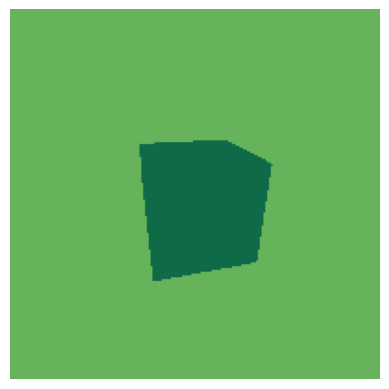

In [2]:
from generate_visualization import create_segmentation_video, create_color_map
import matplotlib.pyplot as plt

T = 0


color_map = create_color_map(data.segmentation)

img = create_segmentation_video(data.segmentation[T], color_map)


plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:

from datasync import get_unity_data
from b3d.io.feature_track_data import FeatureTrackData

datapath = get_unity_data("frogrotating")
ftd = FeatureTrackData.load(datapath)
print(datapath)

/home/tiffa/gcp_assets/b3d_bucket_large/unity/frog/frogrotating/feature_track_data/lit_bg_200p.input.npz


In [6]:
print(ftd.latent_keypoint_positions.shape)

(214, 2395, 3)


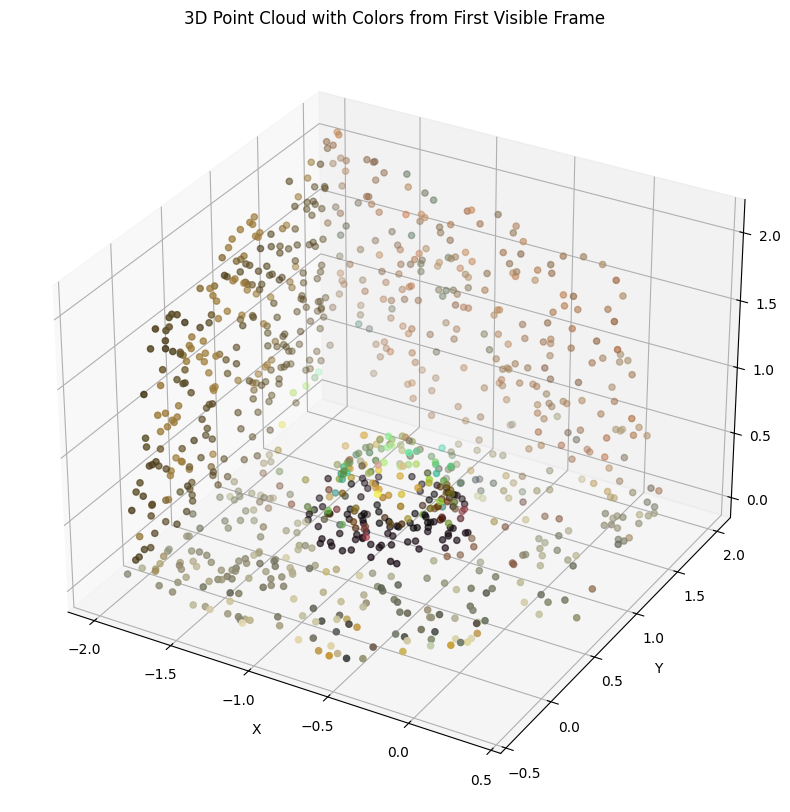

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from unity_to_python import project_to_screen
from scipy.spatial.transform import Rotation
import rerun as rr


def find_first_visible_frame(visibility):
    return np.argmax(visibility, axis=0)


def plot_3d_points_with_colors(rgbd, point_positions, visibility, intrinsics, camera_positions, camera_quaternions):
    # Find the first visible frame for each point
    first_visible_frames = find_first_visible_frame(visibility)
    
    # Extract colors for each point
    colors = []
    for point_idx in range(point_positions.shape[1]):
        frame = first_visible_frames[point_idx]
        if frame < rgbd.shape[0]:  # Check if the point is visible in any frame
            # Project 3D point to 2D image coordinates
            point_3d = point_positions[frame, point_idx]
            point_2d = project_to_screen(
                point_3d, 
                camera_positions[frame], 
                camera_quaternions[frame], 
                intrinsics)
            
            x, y = np.round(point_2d).astype(int)
            
            # Ensure the point is within the image bounds
            x = np.clip(x, 0, rgbd.shape[2] - 1)
            y = np.clip(y, 0, rgbd.shape[1] - 1)
            
            color = rgbd[frame, y, x, :3]
        else:
            print(f"point [{point_idx}] is never visible")
            color = np.array([0.5, 0.5, 0.5])  # Gray for never-visible points
        colors.append(color)
    
    colors = np.array(colors)
    
    # Use the first frame's point positions for plotting
    first_frame_positions = point_positions[0]

    # Create 3D scatter plot     
    fig = plt.figure(figsize=(12, 10))     
    ax = fig.add_subplot(111, projection='3d')          
    scatter = ax.scatter(         
        first_frame_positions[:, 0],         
        first_frame_positions[:, 1],         
        first_frame_positions[:, 2],         
        c=colors,         
        s=20     
        )          
    ax.set_xlabel('X')     
    ax.set_ylabel('Y')     
    ax.set_zlabel('Z')     
    ax.set_title('3D Point Cloud with Colors from First Visible Frame')          
    plt.show()
    
    # # Initialize Rerun
    # rr.init("3D Point Cloud Visualization")

    # # Create a new 3D space
    # rr.log("world", rr.ViewCoordinates.RIGHT_HAND_Z_UP)

    # # Log the point cloud data
    # rr.log("world/point_cloud", 
    #     rr.Points3D(
    #         positions=first_frame_positions,
    #         colors=colors,
    #         sizes=0.01  # Adjust this value to change point size
    #     )
    # )

    # # Set up the view
    # rr.log("world", rr.ViewCoordinates3D(up="+z"))
    # # Show the visualization
    # rr.script_main(rr.show)


# Plot the 3D points
plot_3d_points_with_colors(
    ftd.rgbd_images, 
    ftd.latent_keypoint_positions, 
    ftd.keypoint_visibility, 
    ftd.camera_intrinsics, 
    ftd.camera_position, 
    ftd.camera_quaternion)

In [2]:
import viser
server = viser.ViserServer()
from pose import Pose
import numpy as np
from b3d.camera import xyz_from_depth


server.reset_scene()

def plot_frame(data, T):
    pose = Pose(data.camera_position[T], data.camera_quaternion[T])

    server.add_point_cloud(
        f"/point_cloud{T}",
        points=np.array(pose.apply(xyz[T]).reshape(-1, 3)),
        colors=data.rgbd_images[T,...,:3].reshape(-1,3),
        point_size=0.005
    )
    server.add_frame(
        f"/{T}",
        wxyz=(pose._quaternion[-1], *pose._quaternion[:3]),
        position=pose.pos
    )


for i in range(30): # ftd.camera_position.shape[0]
    plot_frame(ftd, i)

╭─────────────── viser ───────────────╮
│             ╷                       │
│   HTTP      │ http://0.0.0.0:8081   │
│   Websocket │ ws://0.0.0.0:8081     │
│             ╵                       │
╰─────────────────────────────────────╯

/var/tmp/ipykernel_14653/3927262533.py:8: DeprecationWarning: ViserServer.reset_scene has been deprecated, use ViserServer.scene.reset instead. Alternatively, pin to `viser<0.2.0`.
  server.reset_scene()
/var/tmp/ipykernel_14653/3927262533.py:13: DeprecationWarning: ViserServer.add_point_cloud has been deprecated, use ViserServer.scene.add_point_cloud instead. Alternatively, pin to `viser<0.2.0`.
  server.add_point_cloud(
/var/tmp/ipykernel_14653/3927262533.py:19: DeprecationWarning: ViserServer.add_frame has been deprecated, use ViserServer.scene.add_frame instead. Alternatively, pin to `viser<0.2.0`.
  server.add_frame(


(viser) Connection opened (0, 1 total), 243 persistent messages

In [8]:
from b3d.io.segmented_video_input import SegmentedVideoInput

datapath = get_unity_data_path("rocketinwardcircle", data_class="s", resolution="200")
video_input = SegmentedVideoInput.load(datapath)
# video_input.camera_quaternions

In [74]:
video_input.camera_intrinsics_rgb

Array([2.0000000e+02, 2.0000000e+02, 4.6666666e+02, 4.6666666e+02,
       4.0000000e+02, 4.0000000e+02, 9.9999998e-03, 1.0000000e+01],      dtype=float32)

In [9]:
import viser
# server = viser.ViserServer()
from pose import Pose
import numpy as np
from b3d.camera import xyz_from_depth


server.reset_scene()

def plot_videoframe(data, T):
    pose = Pose(data.camera_positions[T], data.camera_quaternions[T])

    server.add_point_cloud(
        f"/point_cloud{T}",
        points=np.array(pose.apply(data.xyz[T]).reshape(-1, 3)),
        colors=data.rgb[T,...,:3].reshape(-1,3),
        point_size=0.005
    )
    server.add_frame(
        f"/{T}",
        wxyz=(pose._quaternion[-1], *pose._quaternion[:3]),
        position=pose.pos
    )


for i in range(video_input.camera_positions.shape[0]):
    plot_videoframe(video_input, i)

/var/tmp/ipykernel_3698342/325204258.py:8: DeprecationWarning: ViserServer.reset_scene has been deprecated, use ViserServer.scene.reset instead. Alternatively, pin to `viser<0.2.0`.
  server.reset_scene()
/var/tmp/ipykernel_3698342/325204258.py:13: DeprecationWarning: ViserServer.add_point_cloud has been deprecated, use ViserServer.scene.add_point_cloud instead. Alternatively, pin to `viser<0.2.0`.
  server.add_point_cloud(
/var/tmp/ipykernel_3698342/325204258.py:19: DeprecationWarning: ViserServer.add_frame has been deprecated, use ViserServer.scene.add_frame instead. Alternatively, pin to `viser<0.2.0`.
  server.add_frame(


(viser) Connection closed (0, 0 total)

(viser) Connection closed (0, 0 total)

In [1]:
from pathlib import Path
Path.home()

PosixPath('/home/tiffany')

In [12]:
from FBExtractor import FBExtractor
from matplotlib import pyplot as plt

# zip_path = 'FBData/fbtest_lit_nobg_200p.zip'
zip_path = 'FBData/fbtest_lit_nobg_800p.zip'

extractor = FBExtractor(zip_path)
T=0

(48, 800, 800, 3)


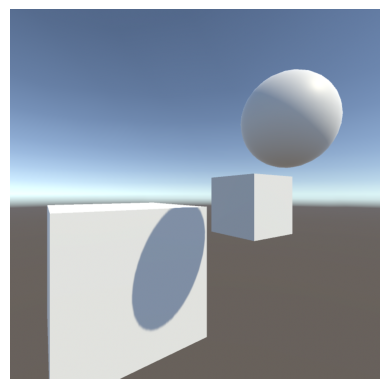

In [13]:
rgb = extractor.extract_rgb()
print(rgb.shape)

plt.imshow(rgb[T])
plt.axis('off')
plt.show()

(100, 800, 800)


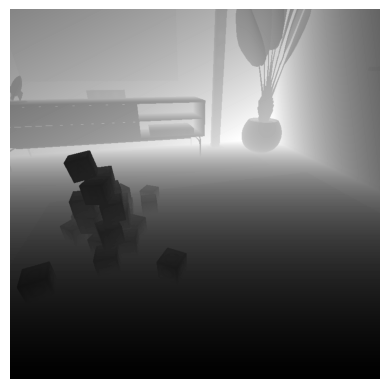

In [4]:
depth = extractor.extract_depth()
print(depth.shape)

plt.imshow(depth[T], cmap='gray')
plt.axis('off')
plt.show()

(100, 800, 800)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 33 34 35 37 39 44 45 53 54 64 66 67 68 71 83]


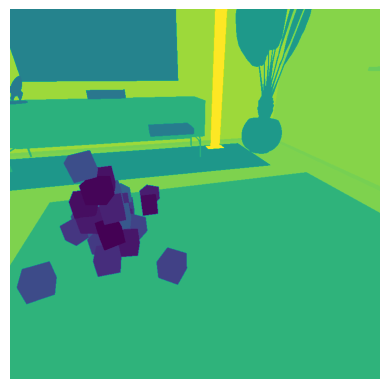

In [5]:
segmentation = extractor.extract_segmentation()
print(segmentation.shape)
print(np.unique(segmentation))

plt.imshow(segmentation[T])
plt.axis('off')
# plt.colorbar(ticks=np.arange(len(np.unique(segmentation))))
plt.show()

In [3]:
from unity_data import UnityData

unity_data = UnityData.from_zip(zip_path)

In [4]:
unity_data.keypoint_visibility.shape

(100, 632)

In [8]:
unity_data.latent_keypoint_positions.shape

(100, 632, 3)